# Desarrollo de Aplicaciones para el Análisis de Datos. - Práctica 2
---

# Sección nueva

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importamos las librerías necesarias y también cargamos el archivo csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


flight=pd.read_csv("/content/drive/MyDrive/Data_acd/flights - flights.csv")

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips:
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [7]:
#Encontramos todos los valores nulos y  en que columnas se encuentran

flight.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             1405
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [8]:

#Cuáles son los valores que contiene esa columna
flight['DepDel15'].value_counts()

0.0    112241
1.0     28432
Name: DepDel15, dtype: int64

In [9]:
#Localizamos los patrones que tienen valores nulos y les modificamos su valor
flight.loc[(flight['DepDel15'].isnull()) & (flight['DepDelay']>=15),'DepDel15']=1
flight.loc[(flight['DepDel15'].isnull()) & (flight['DepDelay']<15),'DepDel15']=0

In [10]:
#Verificamos que efectivamente se hayan modificado
flight.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

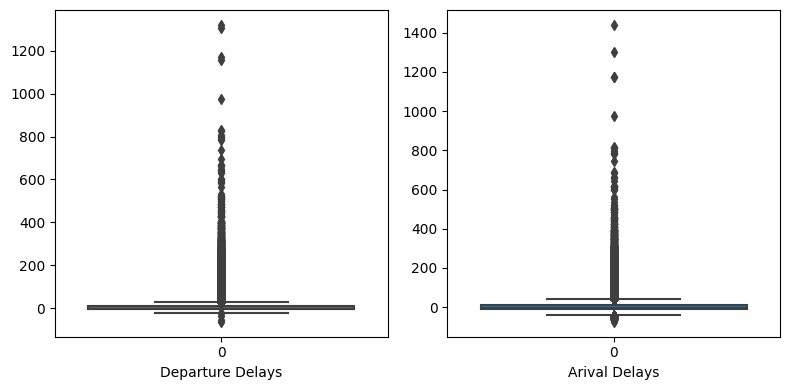

In [11]:
#Observamos como esta distribuidas las tablas DepDelay y ArrDelay
import seaborn as sns

#Creamos el espacio para poder realizar 2 boxplots
fig, ejes = plt.subplots(1, 2, figsize = (8,4))

#Aqui creamos cada boxplot y en el parametro ax le mandamos ejes[0] o ejes[1]
sns.boxplot(data=flight['DepDelay'], ax=ejes[0])
sns.boxplot(data=flight['ArrDelay'], ax=ejes[1])

#Nombramos los ejes x de cada boxplot
ejes[0].set_xlabel("Departure Delays")
ejes[1].set_xlabel("Arival Delays")
plt.tight_layout()

plt.show()

In [12]:
#Utilizamos la funcion percentile de numpy para poder recortar los datos en sus percentiles 1 y 90

DepDelay_percentil_1 = np.percentile(flight['DepDelay'], 1)
DepDelay_percentil_90 = np.percentile(flight['DepDelay'], 90)

ArrDelay_percentil_1 = np.percentile(flight['ArrDelay'], 1)
ArrDelay_percentil_90 = np.percentile(flight['ArrDelay'], 90)

#Creamo un nuevo dataframe con los datos recortados
datos_recortados = flight[(flight['DepDelay'] >= DepDelay_percentil_1 ) & (flight['DepDelay'] <= DepDelay_percentil_90) & (flight['ArrDelay']>= ArrDelay_percentil_1) & (flight['ArrDelay']<= ArrDelay_percentil_90) ]

In [13]:
#Mostrar como se ven los datos de manera recortada
datos_recortados.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


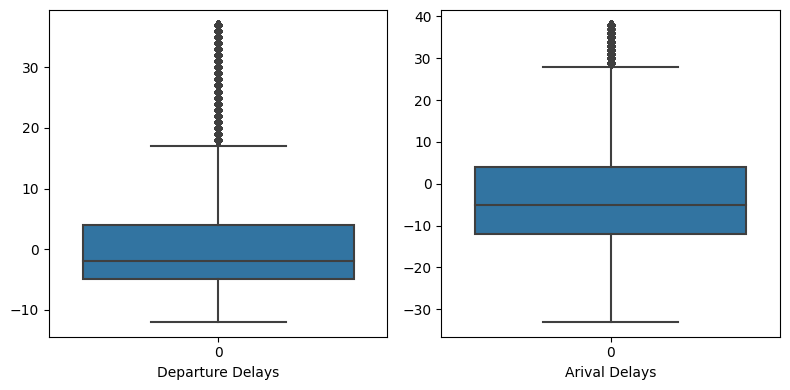

In [14]:
#Creamos nuevos box plot pero ahora con los datos ya recortados con los percentiles 1 y 90

fig, ejes = plt.subplots(1, 2, figsize = (8,4))

sns.boxplot(data=datos_recortados['DepDelay'], ax=ejes[0])
sns.boxplot(data=datos_recortados['ArrDelay'], ax=ejes[1])

ejes[0].set_xlabel("Departure Delays")
ejes[1].set_xlabel("Arival Delays")
plt.tight_layout()

plt.show()

In [15]:
#Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
print(datos_recortados.describe())

           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  123782.0  123782.000000  123782.000000  123782.000000    123782.000000   
mean     2013.0       7.009751      15.806208       3.902886     12753.365037   
std         0.0       1.998766       8.855072       1.995527      1507.616065   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      24.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  123782.000000  123782.000000  123782.000000  123782.000000   
mean    12733.927607    1298.494563       1.329911       0.106203   
std      1505.270188     469.660650       9.356757       0.3080

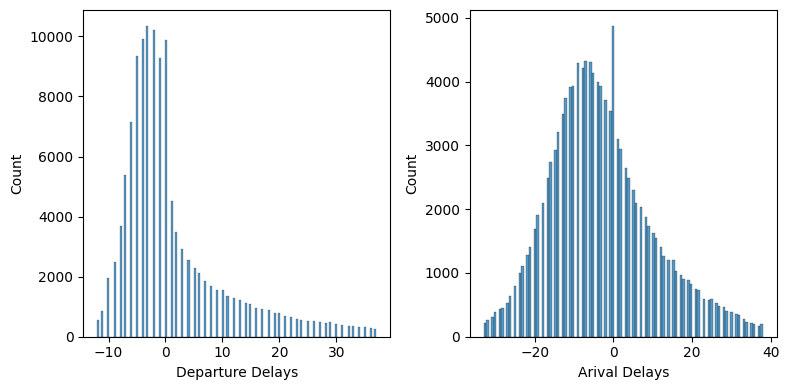

In [16]:
#Determina la distribución de las columnas DepDelay y ArrDelay.

fig, ejes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(data=datos_recortados['DepDelay'], ax=ejes[0])
sns.histplot(data=datos_recortados['ArrDelay'], ax=ejes[1])

ejes[0].set_xlabel("Departure Delays")
ejes[1].set_xlabel("Arival Delays")
plt.tight_layout()

plt.show()

In [17]:
#¿Cuáles son los promedios (mean) de salida y llegada?

print("El promedio de retrasos en llegadas es: ",round(datos_recortados['ArrDelay'].mean(),2))
print("El promedio de retrasos en salidas es: ",round(datos_recortados['DepDelay'].mean(),2))

El promedio de retrasos en llegadas es:  -3.06
El promedio de retrasos en salidas es:  1.33


Text(0.5, 1.0, 'Numero de llegadas retrasadas por compañia')

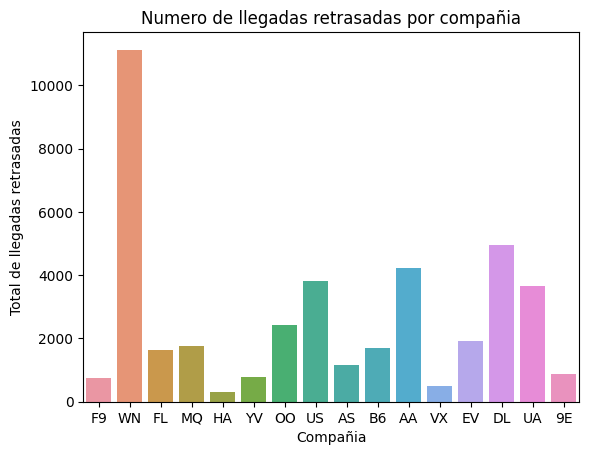

In [23]:
#¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?

promedio_retraso_llegada = datos_recortados.groupby('Carrier')['ArrDelay'].mean().reset_index()


vuelos_retrasados = datos_recortados[datos_recortados['ArrDelay'] > 0]
total_vuelos_retrasados = vuelos_retrasados.groupby('Carrier')['ArrDelay'].count().reset_index()


total_vuelos = datos_recortados.groupby('Carrier')['ArrDelay'].count().reset_index()


proporcion_retrasos = total_vuelos_retrasados['ArrDelay'] / total_vuelos['ArrDelay']


comparacion_retrasos_llegada = pd.DataFrame({
    'Carrier': total_vuelos_retrasados['Carrier'],
    'Promedio_Retraso_Llegada': promedio_retraso_llegada['ArrDelay'],
    'Total_Vuelos_Retrasados': total_vuelos_retrasados['ArrDelay'],
    'Total_Vuelos': total_vuelos['ArrDelay'],
    'Proporcion_Retrasos': proporcion_retrasos
})


comparacion_retrasos_llegada = comparacion_retrasos_llegada.sort_values(by='Promedio_Retraso_Llegada', ascending=False)


fig=sns.barplot(x=comparacion_retrasos_llegada['Carrier'],y=comparacion_retrasos_llegada['Total_Vuelos_Retrasados'])
fig.set_xlabel("Compañia")
fig.set_ylabel("Total de llegadas retrasadas")
fig.set_title("Numero de llegadas retrasadas por compañia")


In [37]:
#¿Hay días de la semana más propensos a las llegadas que otros?

datos_recortados[datos_recortados['ArrDelay']>0].value_counts('DayOfWeek')


DayOfWeek
4    6633
5    6437
1    6317
3    6278
2    5784
7    5659
6    4432
dtype: int64

In [39]:
#¿Cuál es el aeropuerto de salida con mayor retraso medio?
airport_retraso=pd.DataFrame()
airport_retraso=datos_recortados[(datos_recortados['DepDelay']>0)]

In [42]:
airport_retraso.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0


In [55]:
airport_retraso.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)

OriginAirportName
LaGuardia                                     12.918506
Cincinnati/Northern Kentucky International    12.888889
Richmond International                        12.601770
Chicago Midway International                  12.588872
Palm Beach International                      12.566434
                                                ...    
Ted Stevens Anchorage International            9.728395
Kahului Airport                                9.475806
Ontario International                          9.461818
Sacramento International                       9.388889
Honolulu International                         8.977578
Name: DepDelay, Length: 70, dtype: float64

In [79]:
#¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?
ans=datos_recortados['DepDelay'].corr(datos_recortados['ArrDelay'])
datos_filtrados=pd.DataFrame()
datos_filtrados=datos_recortados[datos_recortados['DepDelay']<1]
ans2=datos_filtrados['DepDelay'].corr(datos_recortados['ArrDelay'])



print("El "+ str(round(ans*ans*100,2))+"% de las salidas tardías se puede explicar por la relación líneal que existe entre las llegadas tardías y las salidas tardías.\nMientras que el ",str(round(ans2*ans2*100,2)),"% de las salidas a tiempo se puede explicar por la relación líneal que existe entre las llegadas tardías y las salidas a tiempo.\nPor lo tanto Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales.")


El 38.62% de las salidas tardías se puede explicar por la relación líneal que existe entre las llegadas tardías y las salidas tardías.
Mientras que el  4.85 % de las salidas a tiempo se puede explicar por la relación líneal que existe entre las llegadas tardías y las salidas a tiempo.
Por lo tanto Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales.


2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*
         

In [81]:
promedio_retraso_llegada_rutas = datos_recortados.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index()
promedio_retraso_llegada_rutas = promedio_retraso_llegada_rutas.sort_values(by='ArrDelay', ascending=False)
ruta_con_mayor_retraso_promedio = promedio_retraso_llegada_rutas.iloc[0]

print("Ruta con el mayor retraso promedio en la llegada:")
print("Origen:",ruta_con_mayor_retraso_promedio['OriginAirportName'])
print("Destino:",ruta_con_mayor_retraso_promedio['DestAirportName'])
print("Promedio de retraso en la llegada:",ruta_con_mayor_retraso_promedio['ArrDelay'])

Ruta con el mayor retraso promedio en la llegada:
Origen: Louis Armstrong New Orleans International
Destino: Ronald Reagan Washington National
Promedio de retraso en la llegada: 25.0
